In [2]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:

# Step 1: Load the dataset
data = pd.read_csv('/content/drive/MyDrive/_annotations(orignal).csv')


In [4]:
# Step 2: Explore the Dataset
print(data.head())  # Print the first few rows of the DataFrame
print(data.columns)  # Print the column names
print(data.describe())  # Print statistical summaries of the dataset


                                            filename   width  height  \
0  resized_194_jpg.rf.f4cd294f6ba11ebdc92a5099eb9...  1000.0  1000.0   
1  resized_50_jpg.rf.f4e0e6ce84345e1988200e7992ab...  1000.0  1000.0   
2  resized_201_jpg.rf.f4e26abdf4612f4ba8d158e8bd5...  1000.0  1000.0   
3  resized_292_jpg.rf.f52949c4d6c03bf82eff078f5e9...  1000.0  1000.0   
4  resized_193_jpg.rf.f4ed4ffde42755ba615d0e6fbfe...  1000.0  1000.0   

            class   xmin   ymin   xmax   ymax  
0  POWDERY_MILDEW  180.0   74.0  973.0  967.0  
1       LEAFMINER  346.0  230.0  751.0  793.0  
2      FRESH_LEAF  203.0  414.0  797.0  813.0  
3      FRESH_LEAF  363.0  434.0  641.0  893.0  
4      FRESH_LEAF    0.0    0.0  377.0  300.0  
Index(['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax'], dtype='object')
        width  height         xmin         ymin         xmax         ymax
count  9023.0  9023.0  9023.000000  9023.000000  9023.000000  9023.000000
mean   1000.0  1000.0   299.767926 

In [5]:
# Step 3: Preprocess the dataset
# Assuming 'class' column contains the labels
X = data.drop(['filename', 'class'], axis=1)  # Remove irrelevant columns
y = data['class']  # Extract the labels

# Convert string labels to numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


In [6]:
# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='mean')  # Use mean strategy, but you can choose another suitable one
X_train = imputer.fit_transform(X_train)


In [7]:
# Step 5: Preprocess the testing data
X_test = imputer.transform(X_test)


In [8]:
# Step 6: Train the Naive Bayes classifier (Model)
# Create a Naive Bayes classifier object
naive_bayes_model = GaussianNB()

# Train the model using the training data
naive_bayes_model.fit(X_train, y_train)

GaussianNB()

In [9]:
# Step 7: Predict using the trained model
y_pred = naive_bayes_model.predict(X_test)


In [10]:
# Step 8: Decode the numerical labels back to string labels (optional)
y_pred_labels = label_encoder.inverse_transform(y_pred)
y_test_labels = label_encoder.inverse_transform(y_test)


In [11]:
# Step 9: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.40873893805309736


In [12]:
# Evaluate the model's performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.40873893805309736
Precision: 0.5434583634335503
Recall: 0.4902537165561915
F1-score: 0.43477977302976634


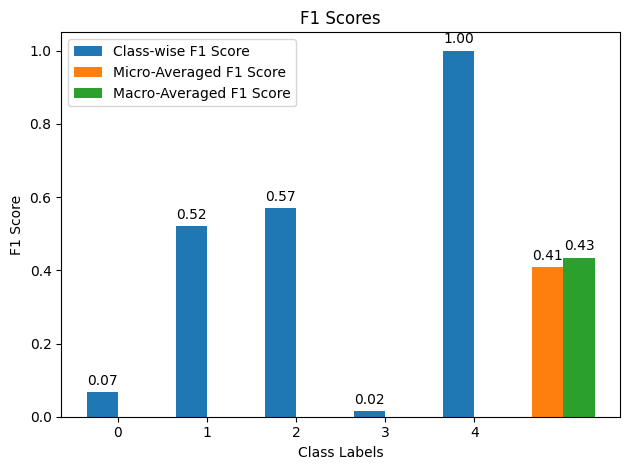

Micro-Averaged F1 Score: 0.40873893805309736
Macro-Averaged F1 Score: 0.43477977302976634


In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score

# Compute micro-averaged F1 score
f1_micro = f1_score(y_test, y_pred, average='micro')

# Compute macro-averaged F1 score
f1_macro = f1_score(y_test, y_pred, average='macro')

# Calculate class-wise F1 scores
class_f1_scores = f1_score(y_test, y_pred, average=None)

# Get the unique class labels
unique_labels = np.unique(y_test)

# Plot the bar plot
x = np.arange(len(unique_labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, class_f1_scores, width, label='Class-wise F1 Score')
rects2 = ax.bar(len(unique_labels) - width/2, f1_micro, width, label='Micro-Averaged F1 Score')
rects3 = ax.bar(len(unique_labels) + width/2, f1_macro, width, label='Macro-Averaged F1 Score')

ax.set_ylabel('F1 Score')
ax.set_xlabel('Class Labels')
ax.set_title('F1 Scores')
ax.set_xticks(x)
ax.set_xticklabels(unique_labels)
ax.legend()

# Add labels to the bar plot
for rect in rects1 + rects2 + rects3:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # Offset label position above bar
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("Micro-Averaged F1 Score:", f1_micro)
print("Macro-Averaged F1 Score:", f1_macro)


In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize the true labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Compute predicted probabilities for each class
y_pred_prob = naive_bayes_model.predict_proba(X_test)

# Compute multiclass AUC score
auc_score = roc_auc_score(y_test_bin, y_pred_prob, average='macro')

print("Multiclass AUC Score:", auc_score)


Multiclass AUC Score: 0.7340124493979008


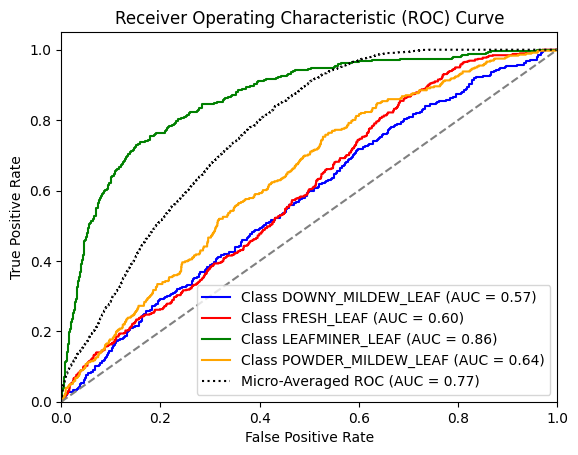

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the true labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Compute predicted probabilities for each class
y_pred_prob = naive_bayes_model.predict_proba(X_test)

# Compute false positive rate (FPR) and true positive rate (TPR) for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

class_names = ['DOWNY_MILDEW_LEAF', 'FRESH_LEAF', 'LEAFMINER_LEAF', 'POWDER_MILDEW_LEAF']

for i, class_name in enumerate(class_names):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-averaged ROC curve and AUC score
fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot ROC curves for each class
plt.figure()
colors = ['blue', 'red', 'green', 'orange']  # Add more colors if needed
for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, label='Class {} (AUC = {:.2f})'.format(class_names[i], roc_auc[i]))

# Plot micro-averaged ROC curve
plt.plot(fpr_micro, tpr_micro, color='black', linestyle=':', label='Micro-Averaged ROC (AUC = {:.2f})'.format(roc_auc_micro))

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal dotted line representing the random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Accuracy: 0.40873893805309736


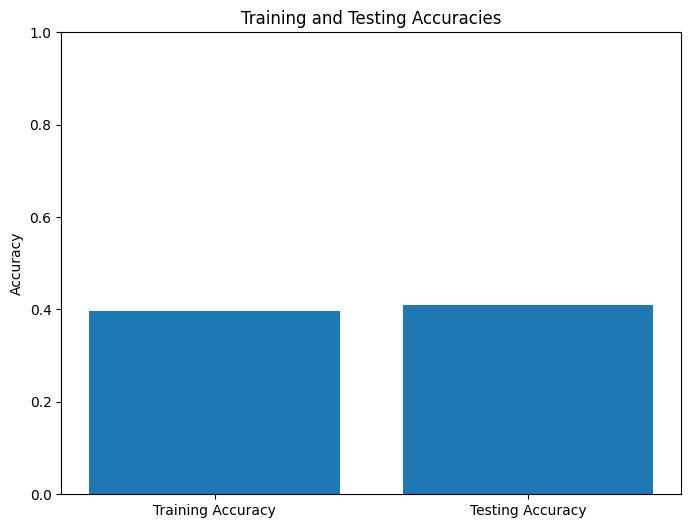

In [25]:
# Step 9: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Step 10: Calculate training accuracy
train_accuracy = accuracy_score(y_train, naive_bayes_model.predict(X_train))

# Step 11: Plot training and testing accuracies
plt.figure(figsize=(8, 6))
labels = ['Training Accuracy', 'Testing Accuracy']
values = [train_accuracy, accuracy]
plt.bar(labels, values)
plt.title('Training and Testing Accuracies')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)
plt.show()


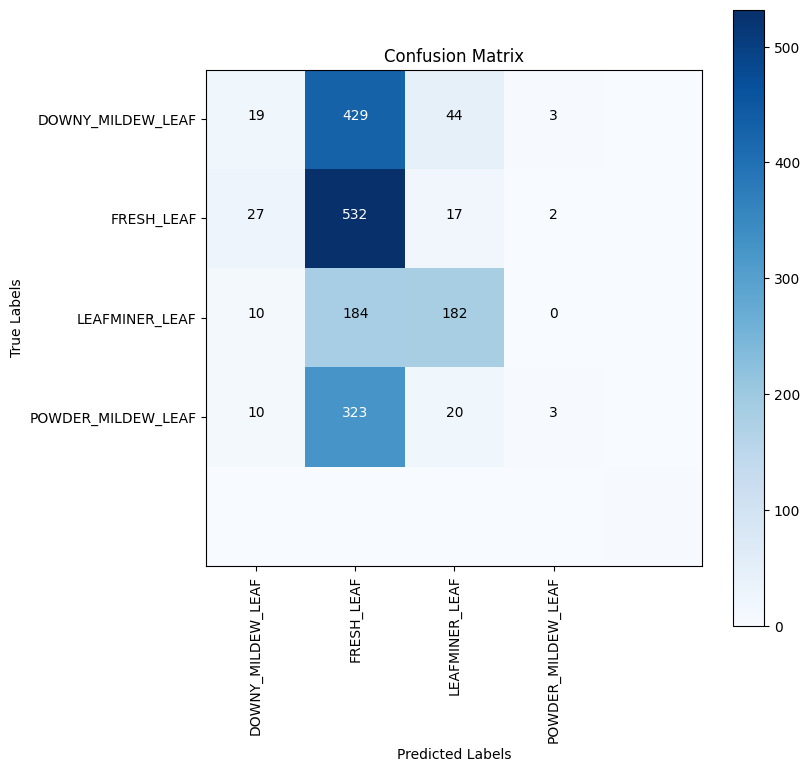

In [27]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test , y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(np.arange(len(class_names)), class_names, rotation=90)
plt.yticks(np.arange(len(class_names)), class_names)

# Display the values in each cell
thresh = cm.max() / 2.0
for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.show()
